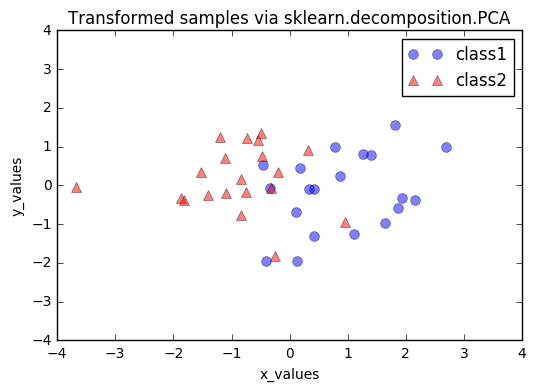

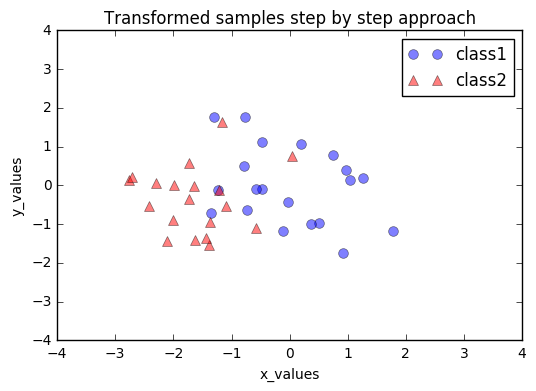

In [57]:
import numpy as np
import pandas as pd
import glob
import os
import unittest
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt

class PCA():

    def get_data(self, path):
        files = glob.glob(path)
        frames = (pd.read_csv(f) for f in files)
        all_frames = pd.concat(frames, ignore_index=True)
        del all_frames["Date"]

        # return as numpy array
        return all_frames.as_matrix().T
    
    def get_data1(self):
        np.random.seed(1) # random seed for consistency

        # A reader pointed out that Python 2.7 would raise a
        # "ValueError: object of too small depth for desired array".
        # This can be avoided by choosing a smaller random seed, e.g. 1
        # or by completely omitting this line, since I just used the random seed for
        # consistency.

        mu_vec1 = np.array([0,0,0])
        cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
        class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

        mu_vec2 = np.array([1,1,1])
        cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
        class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
        
        return np.concatenate((class1_sample, class2_sample), axis=1)

    def calc_cov_matrix(self, matrix):
        return np.cov([matrix[i, :] for i in range(matrix.shape[0])])

    def calc_eig(self, cov_matrix):
        return np.linalg.eig(cov_matrix)   

    def apply_eig_reduction(self, matrix):
        def reduce_space(eig_val, eig_vec, dim=2):
            eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(eig_val.shape[0])]                        
            eig_pairs.sort(key=lambda x: x[0], reverse=True)
            matrix_w = np.hstack((eig_pairs[i][1].reshape(3,1) for i in range(dim)))
            
            return matrix_w.T.dot(matrix) 

        cov_matrix = self.calc_cov_matrix(matrix)
        eig_val, eig_vec = calc_eig_vectors_values(cov_matrix)

        return reduce_space(eig_val, eig_vec, dim=2)


pca = PCA()
# matrix = pca.get_data("price_csv/*.csv")
matrix = pca.get_data1()
# print(matrix)
transformed = pca.apply_eig_reduction(matrix)


sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(matrix.T)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()


class PCATest(unittest.TestCase):
    
    def setUp(self):
        self.data = np.array([[i for i in range(6)], 
                              [i + 1 for i in range(6)], 
                              [i + 2 for i in range(6)], 
                              [i + 3 for i in range(6)], 
                              [i + 4 for i in range(6)], 
                              [i + 5 for i in range(6)]])
        self.means = np.array([[sum(self.data[i,:])/6] for i in range(6)])
        self.reduced = np.array([[6.12372436, 8.5732141, 11.02270384, 13.47219359, 15.92168333, 18.37117307], 
                                 [-2.80545519, -2.80545519, -2.80545519, -2.80545519, -2.80545519, -2.80545519]])
        
    def test_mean_vector(self):
        np.testing.assert_almost_equal(self.means, calc_mean_vector(self.data), err_msg="Means are not equal")
        
    def test_eig_reduction(self):
        np.testing.assert_almost_equal(self.reduced, apply_eig_reduction(self.data), err_msg="Reduction is incorrect")


# if __name__ == '__main__':
#     unittest.main(argv=['first-arg-is-ignored'], exit=False)